<a href="https://colab.research.google.com/github/MikeSirya/Exercise-1/blob/main/assignment_geopandas01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment Geopandas 1: Mapping megacities and big cities 

In [ ]:
%%time
# Geopandas dependences
!pip install fiona shapely pyproj rtree descartes mapclassify 
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 464 kB/s 
     |████████████████████████████████| 6.3 MB 36.0 MB/s 
     |████████████████████████████████| 1.0 MB 50.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 21.1 MB/s 
CPU times: user 312 ms, sys: 74.2 ms, total: 387 ms
Wall time: 22.6 s


In [ ]:
import pandas as pd
import geopandas as gpd
import shapely.geometry
import matplotlib.pyplot as plt

We use [countries at 1:100m scale (cultural)](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/) and [populated places at 1:110m scale (cultural)](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/) from [Natural Earth](https://www.naturalearthdata.com/), a web site for public vector datasets available at 1:10m, 1:50m, and 1:110 million scales. 



In [ ]:
!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_populated_places_simple.zip
!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip

--2022-11-29 09:52:46--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_populated_places_simple.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_populated_places_simple.zip [following]
--2022-11-29 09:52:46--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_populated_places_simple.zip
Resolving naciscdn.org (naciscdn.org)... 18.160.46.70, 18.160.46.110, 18.160.46.106, ...
Connecting to naciscdn.org (naciscdn.org)|18.160.46.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37396 (37K) [application/zip]
Saving to: ‘ne_110m_populated_places_simple.zip’

ne_110m_populated_p 100%[===================>]  36.52K  --.-KB/s    in 0s      

2022-11-29 09:52:46 

In [ ]:
!unzip ne_110m_populated_places_simple.zip
!unzip ne_110m_admin_0_countries.zip

Archive:  ne_110m_populated_places_simple.zip
  inflating: ne_110m_populated_places_simple.README.html  
 extracting: ne_110m_populated_places_simple.VERSION.txt  
 extracting: ne_110m_populated_places_simple.cpg  
  inflating: ne_110m_populated_places_simple.dbf  
  inflating: ne_110m_populated_places_simple.prj  
  inflating: ne_110m_populated_places_simple.shp  
  inflating: ne_110m_populated_places_simple.shx  
Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_countries.shx  


In [ ]:
!ls

ne_110m_admin_0_countries.cpg
ne_110m_admin_0_countries.dbf
ne_110m_admin_0_countries.prj
ne_110m_admin_0_countries.README.html
ne_110m_admin_0_countries.shp
ne_110m_admin_0_countries.shx
ne_110m_admin_0_countries.VERSION.txt
ne_110m_admin_0_countries.zip
ne_110m_populated_places_simple.cpg
ne_110m_populated_places_simple.dbf
ne_110m_populated_places_simple.prj
ne_110m_populated_places_simple.README.html
ne_110m_populated_places_simple.shp
ne_110m_populated_places_simple.shx
ne_110m_populated_places_simple.VERSION.txt
ne_110m_populated_places_simple.zip
sample_data


1. Read the two shapefiles into the following two `geoDataFrames` variables: `world` and `cities`

In [ ]:
# ADD YOUR OWN CODE HERE
import geopandas
cities =  geopandas.read_file("ne_110m_populated_places_simple.shp")
world = geopandas.read_file("ne_110m_admin_0_countries.shp")

In [ ]:
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,0,...,832,832,562430,2,2,None,Vatican City,7.0,1159127243,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,0,...,29579,29000,0,7,7,None,San Marino,6.1,1159146051,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,Vaduz,1,0,...,36281,5342,33009,7,5,None,Vaduz,6.7,1159146061,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,Lobamba,0,1,...,9782,4557,0,5,4,None,Lobamba,6.0,1159146343,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,0,...,107260,76684,106219,9,8,None,Luxembourg,6.0,1159146437,POINT (6.13000 49.61166)


In [ ]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


2. Check that both variables have the same CRS

In [39]:
# ADD YOUR OWN CODE HERE
cities.crs == world.crs

True

3. Remove *Antarctica* from the `world` variable

In [40]:
# ADD YOUR OWN CODE HERE
world[(world.CONTINENT != 'Antarctica')]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


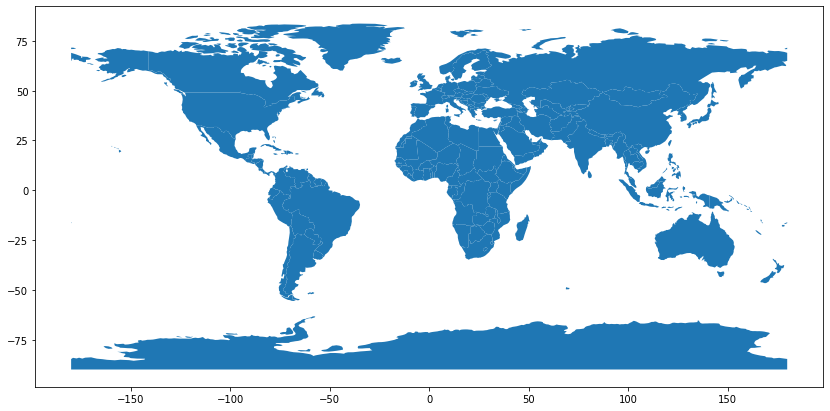

In [41]:
world.plot( figsize=(15,7))

4. Plot `world` and color the countries by `POP_EST`.

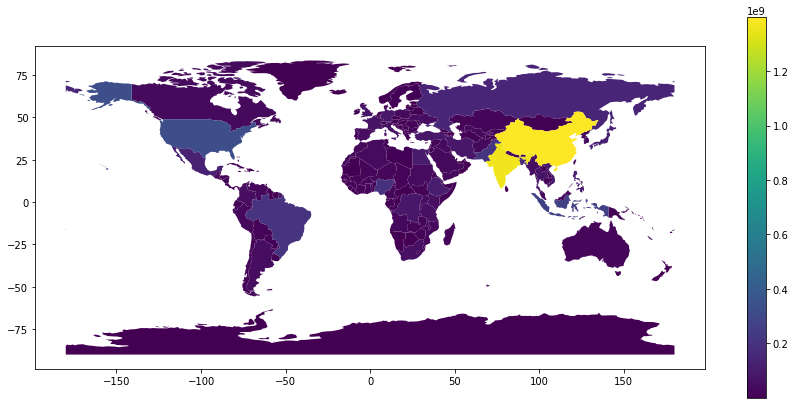

In [46]:
# ADD YOUR OWN CODE HERE
world.plot(column = "POP_EST", legend = True, figsize = (15,7))

5. Select the megacities from the `cities` variable and store them into a new variable called `megacities`. Select the cities that are not megacities from the `cities` variable and store them in new variable called `bigcities`

In [ ]:
# ADD YOUR OWN CODE HERE
megacities = cities.

In [ ]:
megacities.head()

In [ ]:
bigcities.head()

6. Plot `megacities` as green circles of 20 points in size

In [ ]:
# ADD YOUR OWN CODE HERE


7. Plot `bigcities` as light green circles of 5 points in size 

In [ ]:
# ADD YOUR OWN CODE HERE


8. Create a base map where countries are showed semi-transparently (50%). Store the resulting map in the variable `base`. Add `megacities` and `bigcities` as point layers to `base`. Finally, save the map into the file `mapping_megacities.jpeg`. *Note: Do all actions in the same code cell.*





In [ ]:
# ADD YOUR OWN CODE HERE
